In [1]:
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
from sklearn.model_selection import train_test_split
from keras.models import Sequential
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import pandas as pd

load_img = tf.keras.preprocessing.image.load_img
img_to_array = tf.keras.preprocessing.image.img_to_array
Adam = tf.keras.optimizers.Adam
to_categorical = tf.keras.utils.to_categorical

In [2]:
FilePath = "archive/hmnist_28_28_RGB.csv"
dataSet = pd.read_csv(FilePath)
dataSet

,pixel0000,pixel0001,pixel0002,pixel0003,pixel0004,pixel0005,pixel0006,pixel0007,pixel0008,pixel0009,...,pixel2343,pixel2344,pixel2345,pixel2346,pixel2347,pixel2348,pixel2349,pixel2350,pixel2351,label
0,192,153,193,195,155,192,197,154,185,202,...,173,124,138,183,147,166,185,154,177,2
1,25,14,30,68,48,75,123,93,126,158,...,60,39,55,25,14,28,25,14,27,2
2,192,138,153,200,145,163,201,142,160,206,...,167,129,143,159,124,142,136,104,117,2
3,38,19,30,95,59,72,143,103,119,171,...,44,26,36,25,12,17,25,12,15,2
4,158,113,139,194,144,174,215,162,191,225,...,209,166,185,172,135,149,109,78,92,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10010,183,165,181,182,165,180,184,166,182,188,...,208,185,187,208,186,186,206,187,189,0
10011,2,3,1,38,33,32,121,104,103,132,...,96,79,76,24,23,21,3,4,1,0
10012,132,118,118,167,149,149,175,156,160,184,...,204,181,178,181,159,153,172,151,145,0
10013,160,124,146,164,131,152,167,127,146,169,...,185,162,167,184,157,166,185,162,172,0


In [3]:
Label = dataSet["label"]
Data = dataSet.drop(columns=["label"]) 

<AxesSubplot: ylabel='count'>

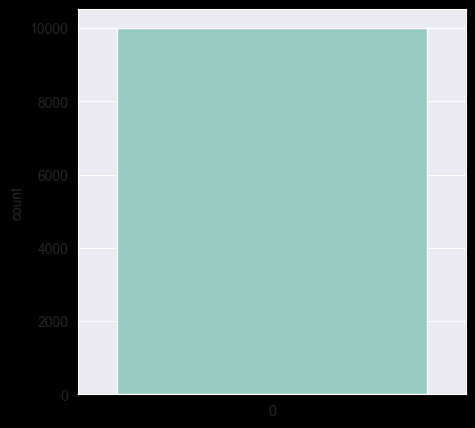

In [4]:
import seaborn as sns

plt.figure(figsize = (5,5))
sns.set_style("darkgrid")
sns.countplot(Label)

In [5]:
from imblearn.over_sampling import RandomOverSampler 

oversample = RandomOverSampler()
Data,Label  = oversample.fit_resample(Data,Label)
Data = np.array(Data).reshape(-1,28,28,3)
print('Shape of Data :', Data.shape)

Shape of Data : (46935, 28, 28, 3)


<AxesSubplot: ylabel='count'>

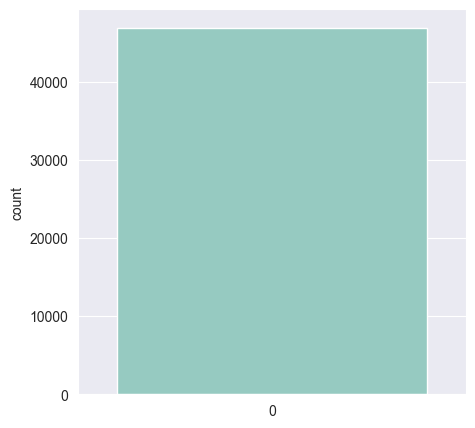

In [6]:
plt.figure(figsize = (5,5))
sns.set_style("darkgrid")
sns.countplot(Label)

In [7]:
Label = np.array(Label)
Label

array([2, 2, 2, ..., 6, 6, 6], dtype=int64)

In [8]:
classes = { 0: ('akiec', 'Actinic keratoses and intraepithelial carcinomae'),
            1:('bcc' , ' basal cell carcinoma'),
            2:('bkl', 'benign keratosis-like lesions'),
            3: ('df', 'dermatofibroma'),
            4: ('nv', ' melanocytic nevi'),
            5: ('vasc', 'vascular lesions'),
            6: ('mel', 'melanoma')}

In [9]:
X_train , X_test , y_train , y_test = train_test_split(Data , Label , test_size = 0.25 , random_state = 49)

In [10]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(35201, 28, 28, 3)
(11734, 28, 28, 3)
(35201,)
(11734,)


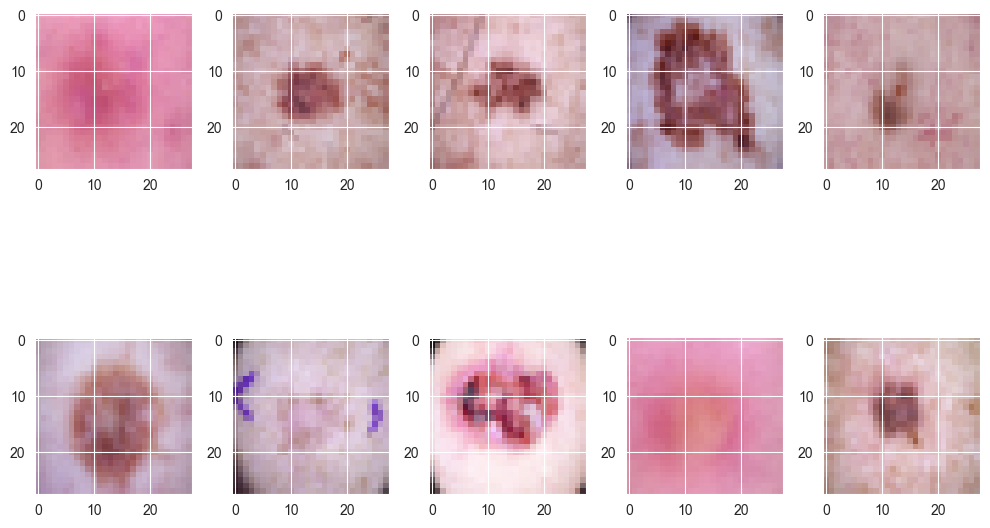

In [11]:
f , ax = plt.subplots(2,5)
f.set_size_inches(10, 10)
k = 0 
for i in range(2):
    for j in range(5):
        ax[i,j].imshow(X_train[k].reshape(28,28,3))
        k = k + 1
    plt.tight_layout()

In [12]:
y_train = to_categorical(y_train, 7)
y_test = to_categorical(y_test, 7)

In [13]:
print(y_train)

[[0. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 ...
 [1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]]


In [14]:
from keras.callbacks import ReduceLROnPlateau
from keras.preprocessing.image import ImageDataGenerator

datagenerator = ImageDataGenerator(rescale=(1./255)
                             ,rotation_range=10
                             ,zoom_range = 0.1
                             ,width_shift_range=0.1
                             ,height_shift_range=0.1)

testgenerator = ImageDataGenerator(rescale=(1./255))

In [15]:
learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy'
                                            , patience = 2
                                            , verbose=1
                                            ,factor=0.5
                                            , min_lr=0.0001)

In [16]:
model = Sequential()
model.add(Conv2D(32,(3,3), activation = 'relu', kernel_initializer= 'he_uniform', padding = 'same', input_shape = (28,28,3)))
model.add(Conv2D(32,(3,3), activation = 'relu', kernel_initializer= 'he_uniform',padding = 'same'))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(64,(3,3), activation = 'relu', kernel_initializer= 'he_uniform', padding = 'same'))
model.add(Conv2D(64,(3,3),activation = 'relu', kernel_initializer= 'he_uniform',padding = 'same'))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(128,(3,3), activation = 'relu', kernel_initializer= 'he_uniform', padding = 'same'))
model.add(Conv2D(128,(3,3),activation = 'relu', kernel_initializer= 'he_uniform',padding = 'same'))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(256,(3,3), activation = 'relu', kernel_initializer= 'he_uniform', padding = 'same'))
model.add(Conv2D(256,(3,3),activation = 'relu', kernel_initializer= 'he_uniform',padding = 'same'))
model.add(MaxPooling2D((2,2)))
model.add(Flatten())
model.add(Dense(128, activation = 'relu', kernel_initializer='he_uniform'))
model.add(Dense(7,activation = 'softmax', kernel_initializer="glorot_uniform" , name = 'classifier'))

In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        896       
                                                                 
 conv2d_1 (Conv2D)           (None, 28, 28, 32)        9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 14, 14, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 64)         0         
 2D)                                                    

In [18]:
model.compile(optimizer= 'adam' , loss = tf.keras.losses.CategoricalCrossentropy(), metrics = ['accuracy'])

In [19]:
history = model.fit(X_train ,
                    y_train ,
                    epochs=25 ,
                    batch_size=128,
                    validation_data=(X_test , y_test) ,
                    callbacks=[learning_rate_reduction])

history

Epoch 1/25
276/276 [==============================] - 129s 465ms/step - loss: 16.3130 - accuracy: 0.5083 - val_loss: 3.2499 - val_accuracy: 0.1881 - lr: 0.0010
Epoch 2/25
276/276 [==============================] - 122s 443ms/step - loss: 1.1018 - accuracy: 0.5858 - val_loss: 2.5022 - val_accuracy: 0.3259 - lr: 0.0010
Epoch 3/25
276/276 [==============================] - 115s 417ms/step - loss: 0.8880 - accuracy: 0.6747 - val_loss: 0.5852 - val_accuracy: 0.7796 - lr: 0.0010
Epoch 4/25
276/276 [==============================] - 127s 461ms/step - loss: 0.4407 - accuracy: 0.8435 - val_loss: 0.3712 - val_accuracy: 0.8757 - lr: 0.0010
Epoch 5/25
276/276 [==============================] - 124s 448ms/step - loss: 0.2722 - accuracy: 0.9070 - val_loss: 0.3535 - val_accuracy: 0.8750 - lr: 0.0010
Epoch 6/25
275/276 [============================>.] - ETA: 0s - loss: 0.2177 - accuracy: 0.9230
Epoch 6: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
276/276 [=======================

In [28]:
from sklearn.metrics import confusion_matrix
import seaborn as sb

y_predicted = model.predict(X_test)
y_predicted = [x.argmax() for x in y_predicted]

367/367 [==============================] - 8s 23ms/step


AttributeError: QuadMesh.set() got an unexpected keyword argument 'format'

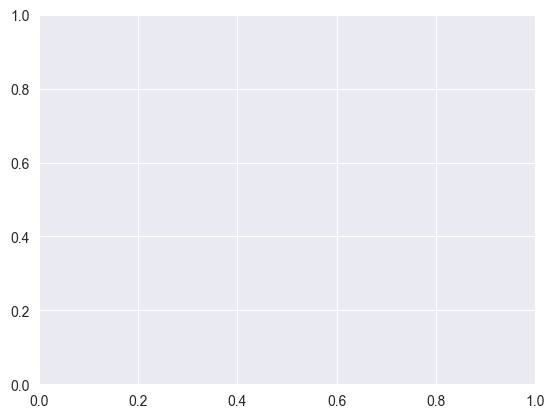

In [30]:
# y_predicted
# [x.argmax() for x in y_test]
# y_test
matrix = confusion_matrix([x.argmax() for x in y_test], y_predicted)


sb.heatmap(matrix, annot=True, fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [ ]:
model.evaluate(X_train, y_train)

1101/1101 [==============================] - 37s 34ms/step - loss: 6.8068e-04 - accuracy: 1.0000


[0.0006806830642744899, 1.0]

In [ ]:
model.save('final_cnn.h5')

,0
count,25.000000
mean,0.925558
std,0.122651
min,0.521349
25%,0.938752
50%,0.979234
75%,0.999489
max,1.000000


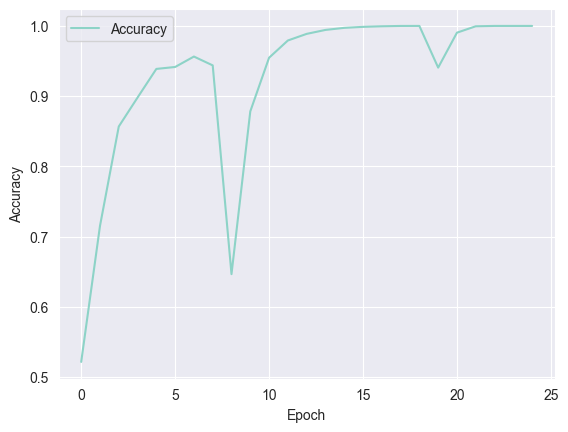

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

data_accuracy = pd.DataFrame(history.history['accuracy'])

plt.plot(data_accuracy, label='Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

data_accuracy.describe()

In [ ]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from tensorflow import keras
image = keras.preprocessing.image

classes = { 0: ('akiec', 'Actinic keratoses and intraepithelial carcinomae'),
            1: ('bcc' , ' basal cell carcinoma'),
            2: ('bkl', 'benign keratosis-like lesions'),
            3: ('df', 'dermatofibroma'),
            4: ('nv', ' melanocytic nevi'),
            5: ('vasc', 'vascular lesions'),
            6: ('mel', 'melanoma') }

def crop_square(img, size, interpolation=cv2.INTER_AREA):
    h, w = img.shape[:2]
    min_size = np.amin([h,w])

    # Centralize and crop
    crop_img = img[int(h/2-min_size/2):int(h/2+min_size/2), int(w/2-min_size/2):int(w/2+min_size/2)]
    resized = cv2.resize(crop_img, (size, size), interpolation=interpolation)

    return resized


def classify(image_fp):

    image = plt.imread(image_fp)
    image = crop_square(image, 28)
    plt.imshow(image)

    model = keras.models.load_model('final_cnn.h5')
    predicted_value = model.predict(np.array([image]))
    
    out  = f"""
      akiec: {predicted_value[0][0]}
        bcc: {predicted_value[0][1]}
        bkl: {predicted_value[0][2]}
         df: {predicted_value[0][3]}
         nv: {predicted_value[0][4]}
       vasc: {predicted_value[0][5]}
        mel: {predicted_value[0][6]}

     Result: {(predicted_value[0][predicted_value.argmax()] * 100)}% {classes[predicted_value.argmax()]}
    """
    return out

1/1 [==============================] - 0s 107ms/step

      akiec: 3.853565327165469e-23
        bcc: 1.4350139370445513e-17
        bkl: 1.2687505490660556e-09
         df: 8.638158547832897e-14
         nv: 1.0
       vasc: 4.6726231178635264e-24
        mel: 1.9189363336945703e-16

     Result: 100.0% ('nv', ' melanocytic nevi')
    


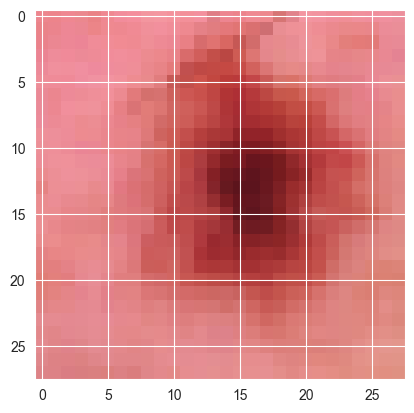

In [ ]:
test_prediction = classify('test/nv/ISIC_0024306.jpg')

print(test_prediction)